# Starter: Zomato Bangalore Restaurants a958ff1e-9

In [1097]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1098]:
df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [1099]:
df.shape

(51717, 17)

In [1100]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [1101]:
df=df.drop(['url', 'address','menu_item','dish_liked', 'reviews_list','phone'],axis=1)

In [1102]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [1103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [1104]:
df.duplicated().sum()

108

# Dropping Duplicates

In [1105]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

# checking null values

In [1106]:
df.isnull().mean()*100

name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.026449
votes                           0.000000
location                        0.040691
rest_type                       0.439846
cuisines                        0.087194
approx_cost(for two people)     0.666550
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

# cleaning rate column

In [1107]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

# removing :'New' ,'-', and '/5' form Rate column

In [1108]:
def fix_rate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
    
df['rate']=df['rate'].apply(fix_rate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

# filling null value in rate columns with mean

In [1109]:
df['rate'].fillna(df['rate'].mean(),inplace=True)
df['rate'].isnull().sum()

0

In [1110]:
df.isnull().mean()*100

name                           0.000000
online_order                   0.000000
book_table                     0.000000
rate                           0.000000
votes                          0.000000
location                       0.040691
rest_type                      0.439846
cuisines                       0.087194
approx_cost(for two people)    0.666550
listed_in(type)                0.000000
listed_in(city)                0.000000
dtype: float64

# Dropping null value

In [1111]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [1112]:
df.duplicated().sum()

0

In [1113]:
df.rename(columns={'approx_cost(for two people)':'cost2people','listed_in(type)':'types'},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2people,types,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [1114]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [1115]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

# 'listed_in(city)' and 'location ',both are thre ,lets keep only one.

In [1116]:
df=df.drop('listed_in(city)',axis=1)

In [1117]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2people,types
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [1118]:
df['cost2people'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

Remove ',' from cost2people

In [1119]:
def handel_cost2people(value):
    if ',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)
    
df['cost2people']=df['cost2people'].apply( handel_cost2people)
df.cost2people.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [1120]:
df.duplicated().sum()

19427

In [1121]:
df.drop_duplicates(inplace=True)

# cleaning rest_type column

In [1122]:
res_type=df['rest_type'].value_counts(ascending=False)       #type of minue
res_type

Quick Bites                   10911
Casual Dining                  6963
Cafe                           2372
Dessert Parlor                 1348
Delivery                       1324
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [1123]:
res_types_lessthan1000=res_type[res_type<1000]    #new cluster
res_types_lessthan1000

Casual Dining, Bar            921
Bakery                        667
Bar                           416
Beverage Shop                 414
Food Court                    382
                             ... 
Pop Up                          1
Quick Bites, Kiosk              1
Mess, Quick Bites               1
Dessert Parlor, Food Court      1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 87, dtype: int64

# Making rest types less than 1000 in frequence as others.

In [1124]:
def handel_rest_type(value):
    if (value in res_types_lessthan1000):
        return 'Other'
    else:
        return value
    
df['rest_type']=df['rest_type'].apply(handel_rest_type)
df['rest_type'].value_counts()

Quick Bites           10911
Other                  7623
Casual Dining          6963
Cafe                   2372
Dessert Parlor         1348
Delivery               1324
Takeaway, Delivery     1074
Name: rest_type, dtype: int64

In [1125]:
def fix_rest_type(value):
    if ',' in value:
        value=value.replace(',','')
        return value
    else:
        return value

In [1126]:
fix_rest_type('Takeaway, Delivery')

'Takeaway Delivery'

In [1127]:
df['rest_type']=df['rest_type'].apply(fix_rest_type)

In [1129]:
df['rest_type'].value_counts()

Quick Bites          10911
Other                 7623
Casual Dining         6963
Cafe                  2372
Dessert Parlor        1348
Delivery              1324
Takeaway Delivery     1074
Name: rest_type, dtype: int64

# cleaning location column

In [1130]:
location=df['location'].value_counts(ascending=False)
location

BTM                     2064
Whitefield              1805
Indiranagar             1659
HSR                     1601
Marathahalli            1524
                        ... 
Kengeri                    5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: location, Length: 93, dtype: int64

In [1131]:
loc_lessthan300=location[location<300]

In [1132]:
location=df['location'].value_counts(ascending=False)

loc_lessthan300=location[location<300]

def handel_location(value):
    if(value in loc_lessthan300 ):
        return 'other'
    else:
        return value
    
df['location']=df['location'].apply(handel_location)
df['location'].value_counts()

other                    4700
BTM                      2064
Whitefield               1805
Indiranagar              1659
HSR                      1601
Marathahalli             1524
Koramangala 5th Block    1421
JP Nagar                 1320
Electronic City          1212
Jayanagar                1099
Bannerghatta Road        1017
Bellandur                 994
Sarjapur Road             867
Brigade Road              614
New BEL Road              582
Banashankari              559
Malleshwaram              550
Kalyan Nagar              550
Brookefield               528
Koramangala 4th Block     519
MG Road                   518
Koramangala 7th Block     510
Koramangala 6th Block     504
Ulsoor                    495
Rajajinagar               458
Frazer Town               441
Koramangala 1st Block     437
Church Street             434
Basavanagudi              433
Banaswadi                 392
Kammanahalli              389
Residency Road            378
Lavelle Road              375
Old Airpor

In [1133]:
def fix(value):
    if '7' in value :
        value=value.replace('7th','seven')
        return value
    else:
        return value

In [1134]:
def fix2(value):
    if '6' in value :
        value=value.replace('6th','six ')
        return value
    else:
        return value

In [1135]:
def fix3(value):
    if '4' in value :
        value=value.replace('4th','four')
        return value
    else:
        return value

In [1136]:
def fix4(value):
    if '1' in value :
        value=value.replace('1st','one')
        return value
    else:
        return value
    
def fix5(value):
    if '5' in value :
        value=value.replace('5th','five')
        return value
    else:
        return value
    
df['location']=df['location'].apply(fix)
df['location']=df['location'].apply(fix2)
df['location']=df['location'].apply(fix3)
df['location']=df['location'].apply(fix4)
df['location']=df['location'].apply(fix5)
df['location'].value_counts()

other                      4700
BTM                        2064
Whitefield                 1805
Indiranagar                1659
HSR                        1601
Marathahalli               1524
Koramangala five Block     1421
JP Nagar                   1320
Electronic City            1212
Jayanagar                  1099
Bannerghatta Road          1017
Bellandur                   994
Sarjapur Road               867
Brigade Road                614
New BEL Road                582
Banashankari                559
Malleshwaram                550
Kalyan Nagar                550
Brookefield                 528
Koramangala four Block      519
MG Road                     518
Koramangala seven Block     510
Koramangala six  Block      504
Ulsoor                      495
Rajajinagar                 458
Frazer Town                 441
Koramangala one Block       437
Church Street               434
Basavanagudi                433
Banaswadi                   392
Kammanahalli                389
Residenc

In [1137]:
fix('Koramangala 7th Block')

'Koramangala seven Block'

# cleaning cuisines column

In [1138]:
cuisines=df['cuisines'].value_counts(ascending=False)
cuisines

North Indian                                                   1709
North Indian, Chinese                                          1374
South Indian                                                   1071
Bakery, Desserts                                                540
Biryani                                                         508
                                                               ... 
Andhra, Hyderabadi                                                1
North Indian, South Indian, Kerala, Chinese                       1
South Indian, Kebab, Chinese, Biryani                             1
Asian, Continental, Mediterranean, Salad, American, Biryani       1
North Indian, Chinese, Arabian, Momos                             1
Name: cuisines, Length: 2704, dtype: int64

In [1139]:
cuisines_lessthan100=cuisines[cuisines<100]
cuisines_lessthan100

Cafe, Desserts                                                 99
Fast Food, Rolls                                               98
Andhra, Biryani                                                98
Andhra                                                         98
Arabian                                                        93
                                                               ..
Andhra, Hyderabadi                                              1
North Indian, South Indian, Kerala, Chinese                     1
South Indian, Kebab, Chinese, Biryani                           1
Asian, Continental, Mediterranean, Salad, American, Biryani     1
North Indian, Chinese, Arabian, Momos                           1
Name: cuisines, Length: 2656, dtype: int64

In [1140]:
def fix_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value

In [1141]:
df['cuisines']=df['cuisines'].apply(fix_cuisines)

In [1142]:
df['cuisines'].value_counts()

others                                              18616
North Indian                                         1709
North Indian, Chinese                                1374
South Indian                                         1071
Bakery, Desserts                                      540
Biryani                                               508
Fast Food                                             424
South Indian, North Indian, Chinese                   422
Cafe                                                  386
Desserts                                              385
Bakery                                                341
Chinese                                               308
Ice Cream, Desserts                                   277
Mithai, Street Food                                   234
Chinese, North Indian                                 217
North Indian, Chinese, Biryani                        211
Desserts, Ice Cream                                   210
North Indian, 

In [1143]:
def fix_cuisines(value):
    if ',' in value:
        value=value.replace(',','')
        return value
    else:
        return value

In [1144]:
fix_cuisines('North Indian, Chinese, Fast Food ')

'North Indian Chinese Fast Food '

In [1145]:
df['cuisines']=df['cuisines'].apply(fix_cuisines)
df['cuisines'].value_counts()

others                                           18616
North Indian                                      1709
North Indian Chinese                              1374
South Indian                                      1071
Bakery Desserts                                    540
Biryani                                            508
Fast Food                                          424
South Indian North Indian Chinese                  422
Cafe                                               386
Desserts                                           385
Bakery                                             341
Chinese                                            308
Ice Cream Desserts                                 277
Mithai Street Food                                 234
Chinese North Indian                               217
North Indian Chinese Biryani                       211
Desserts Ice Cream                                 210
North Indian South Indian                          199
North Indi

In [1146]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2people,types
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Other,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,South Indian North Indian,300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


# clean types column

In [1147]:
df.types.value_counts()

Delivery              14437
Dine-out              11727
Desserts               2228
Cafes                  1157
Drinks & nightlife      871
Buffet                  621
Pubs and bars           574
Name: types, dtype: int64

In [1148]:
def fix_types(value):
    if '-' in value :
        value=value.replace('-','')
        return value 
    else:
        return value
df['types']=df['types'].apply(fix_types)
df.types.value_counts()

Delivery              14437
Dineout               11727
Desserts               2228
Cafes                  1157
Drinks & nightlife      871
Buffet                  621
Pubs and bars           574
Name: types, dtype: int64

In [1149]:
def splits_types(value):
    if '&' in value:
        value=value.replace('&','and')
        return value
    else:
        return value
df['types']=df['types'].apply(splits_types)
df.types.value_counts()

Delivery                14437
Dineout                 11727
Desserts                 2228
Cafes                    1157
Drinks and nightlife      871
Buffet                    621
Pubs and bars             574
Name: types, dtype: int64

In [1150]:
splits_types('Pubs and bars')

'Pubs and bars'

In [1151]:
df.duplicated().sum()

90

In [1152]:
df.drop_duplicates(inplace=True)

In [1153]:
df.duplicated().sum()

0

# creat_new_feature from Rate column 

In [1154]:
def handel_rate(rate):
    if (rate>3.7):
        return 1
    else:
        return 0  
df['new_Rate']=df['rate'].apply(handel_rate)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2people,types,new_Rate
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet,1
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,1
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Other,others,800.0,Buffet,1
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,South Indian North Indian,300.0,Buffet,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,1


In [1155]:
df.duplicated().sum()

0

# Data is clean lets jump to visualization

# unvariate analysis

# visualizing location

In [1156]:
data=df.location.value_counts(ascending=False)
data.head()

other          4678
BTM            2054
Whitefield     1804
Indiranagar    1654
HSR            1598
Name: location, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'other'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Koramangala five Block'),
  Text(11, 0, 'Richmond Road'),
  Text(12, 0, 'Koramangala seven Block'),
  Text(13, 0, 'Koramangala four Block'),
  Text(14, 0, 'Bellandur'),
  Text(15, 0, 'Sarjapur Road'),
  Text(16, 0, 'Whitefield'),
  Text(17, 0, 'Old Airport Road'),
  Text(18, 0, 'Indiranagar'),
  Text(19, 0, 'Koramangala one Block'),
  Text(20, 0, 'Frazer Town'),
  Text(21, 0, 'MG Road'),
  Text(22, 0, 'Brigade Road'),
  Text(23, 0, 'Lavelle Road'),
  Text(24, 0, 'Church Street'),
  Text(25, 0, 'Ulsoor'),
  Text(26, 0, 'Residency Road'),


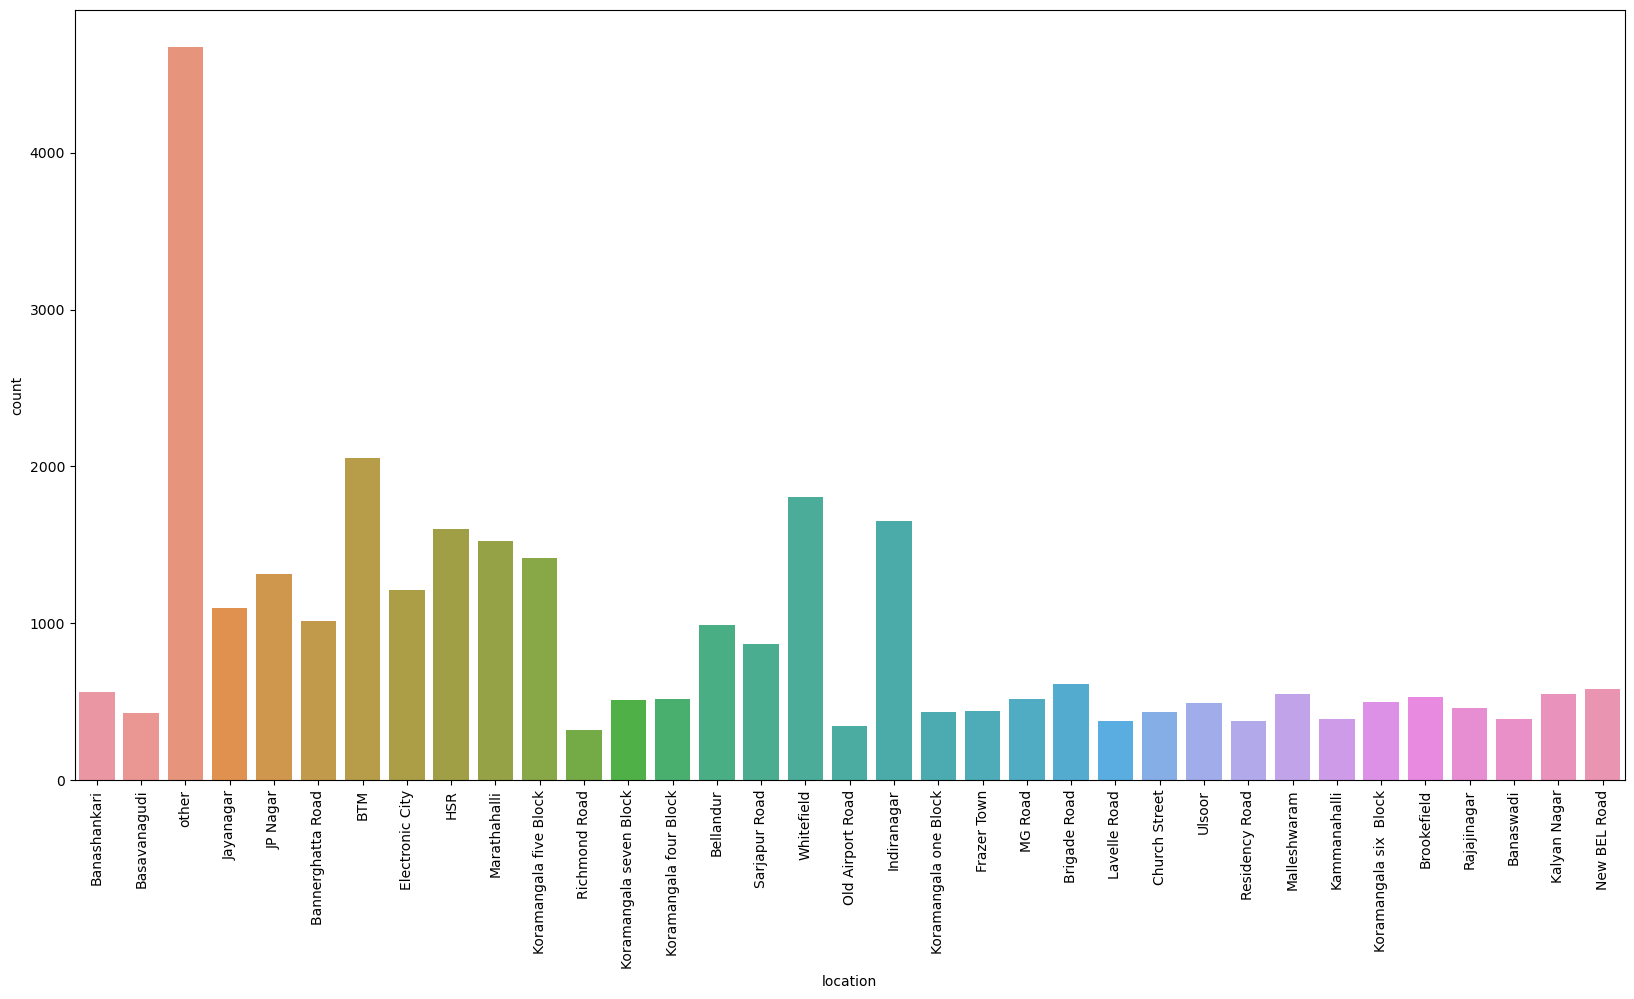

In [1157]:
plt.figure(figsize=(20,10))
ax=sns.countplot(data=df,x='location')
plt.xticks(rotation=90)

# visualizing online order

<AxesSubplot:xlabel='online_order', ylabel='count'>

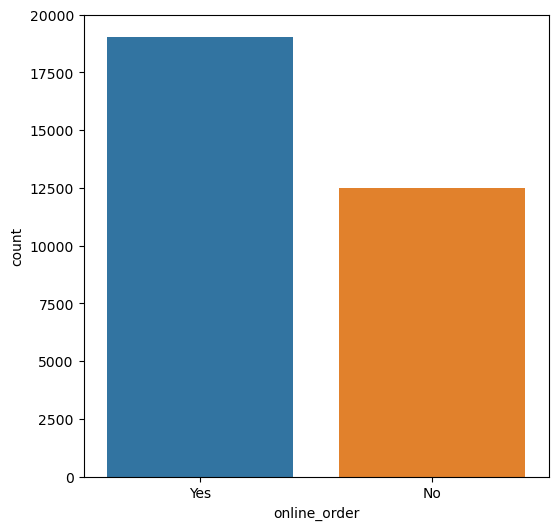

In [1158]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='online_order')

# visualizing book-table

<AxesSubplot:xlabel='book_table', ylabel='count'>

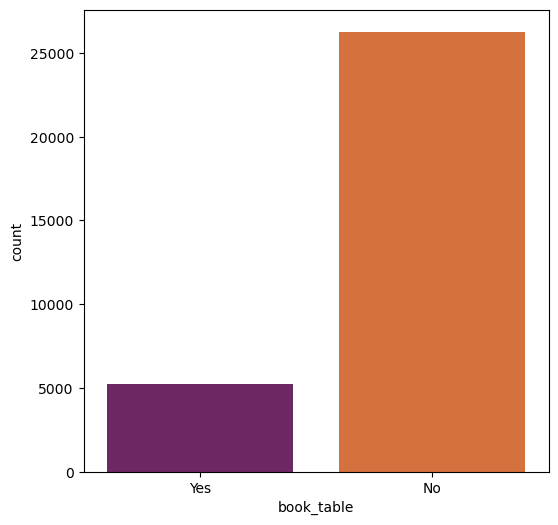

In [1159]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='book_table',palette='inferno')

# visualizing rest_type

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Quick Bites'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Casual Dining'),
  Text(3, 0, 'Cafe'),
  Text(4, 0, 'Dessert Parlor'),
  Text(5, 0, 'Delivery'),
  Text(6, 0, 'Takeaway Delivery')])

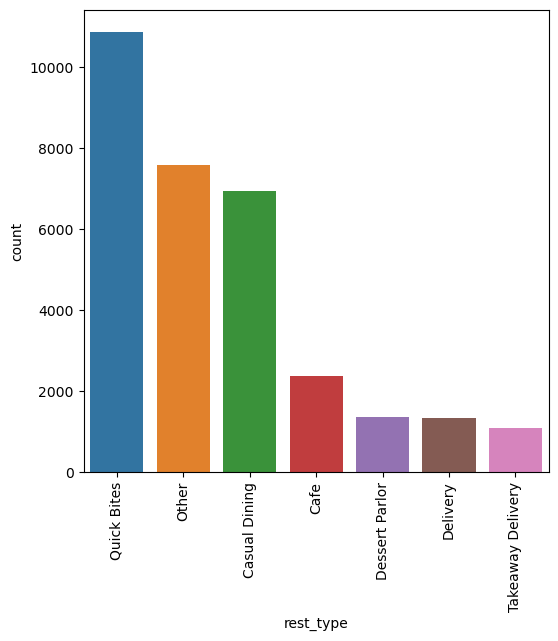

In [1160]:
data=df['rest_type'].value_counts(ascending=False).index   
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='rest_type',order=data)
plt.xticks(rotation=90)

# visualizing type

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Delivery'),
  Text(1, 0, 'Dineout'),
  Text(2, 0, 'Desserts'),
  Text(3, 0, 'Cafes'),
  Text(4, 0, 'Drinks and nightlife'),
  Text(5, 0, 'Buffet'),
  Text(6, 0, 'Pubs and bars')])

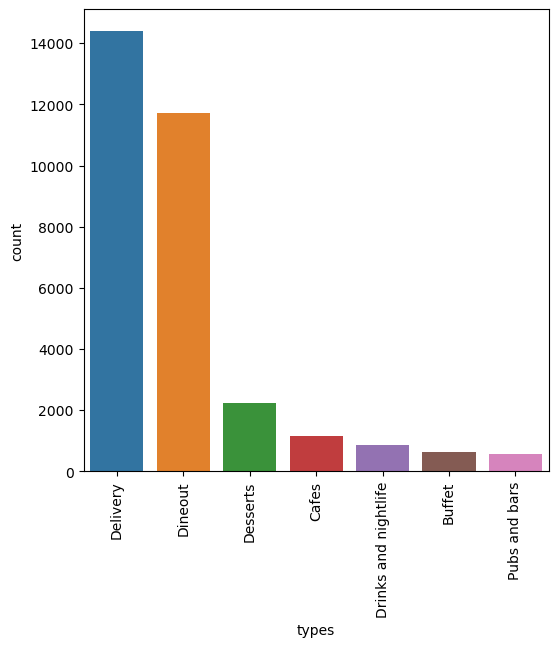

In [1161]:
ar_data=df.types.value_counts(ascending=False).index
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='types',order=ar_data)
plt.xticks(rotation=90)

# visulizing cuisines

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'others'),
  Text(1, 0, 'South Indian North Indian'),
  Text(2, 0, 'North Indian'),
  Text(3, 0, 'Cafe'),
  Text(4, 0, 'Cafe Continental'),
  Text(5, 0, 'Cafe Fast Food'),
  Text(6, 0, 'Bakery Desserts'),
  Text(7, 0, 'Pizza'),
  Text(8, 0, 'Biryani'),
  Text(9, 0, 'North Indian Chinese Fast Food'),
  Text(10, 0, 'South Indian'),
  Text(11, 0, 'Burger Fast Food'),
  Text(12, 0, 'Pizza Fast Food'),
  Text(13, 0, 'North Indian Chinese'),
  Text(14, 0, 'Chinese Thai'),
  Text(15, 0, 'Ice Cream Desserts'),
  Text(16, 0, 'Desserts Beverages'),
  Text(17, 0, 'Chinese'),
  Text(18, 0, 'Bakery'),
  Text(19, 0, 'Fast Food'),
  Text(20, 0, 'Mithai Street Food'),
  Text(21, 0, 'South Indian Chinese'),
  Text(22, 0, 'Biryani North Indian Chinese'),
  Text(23, 0, 'Des

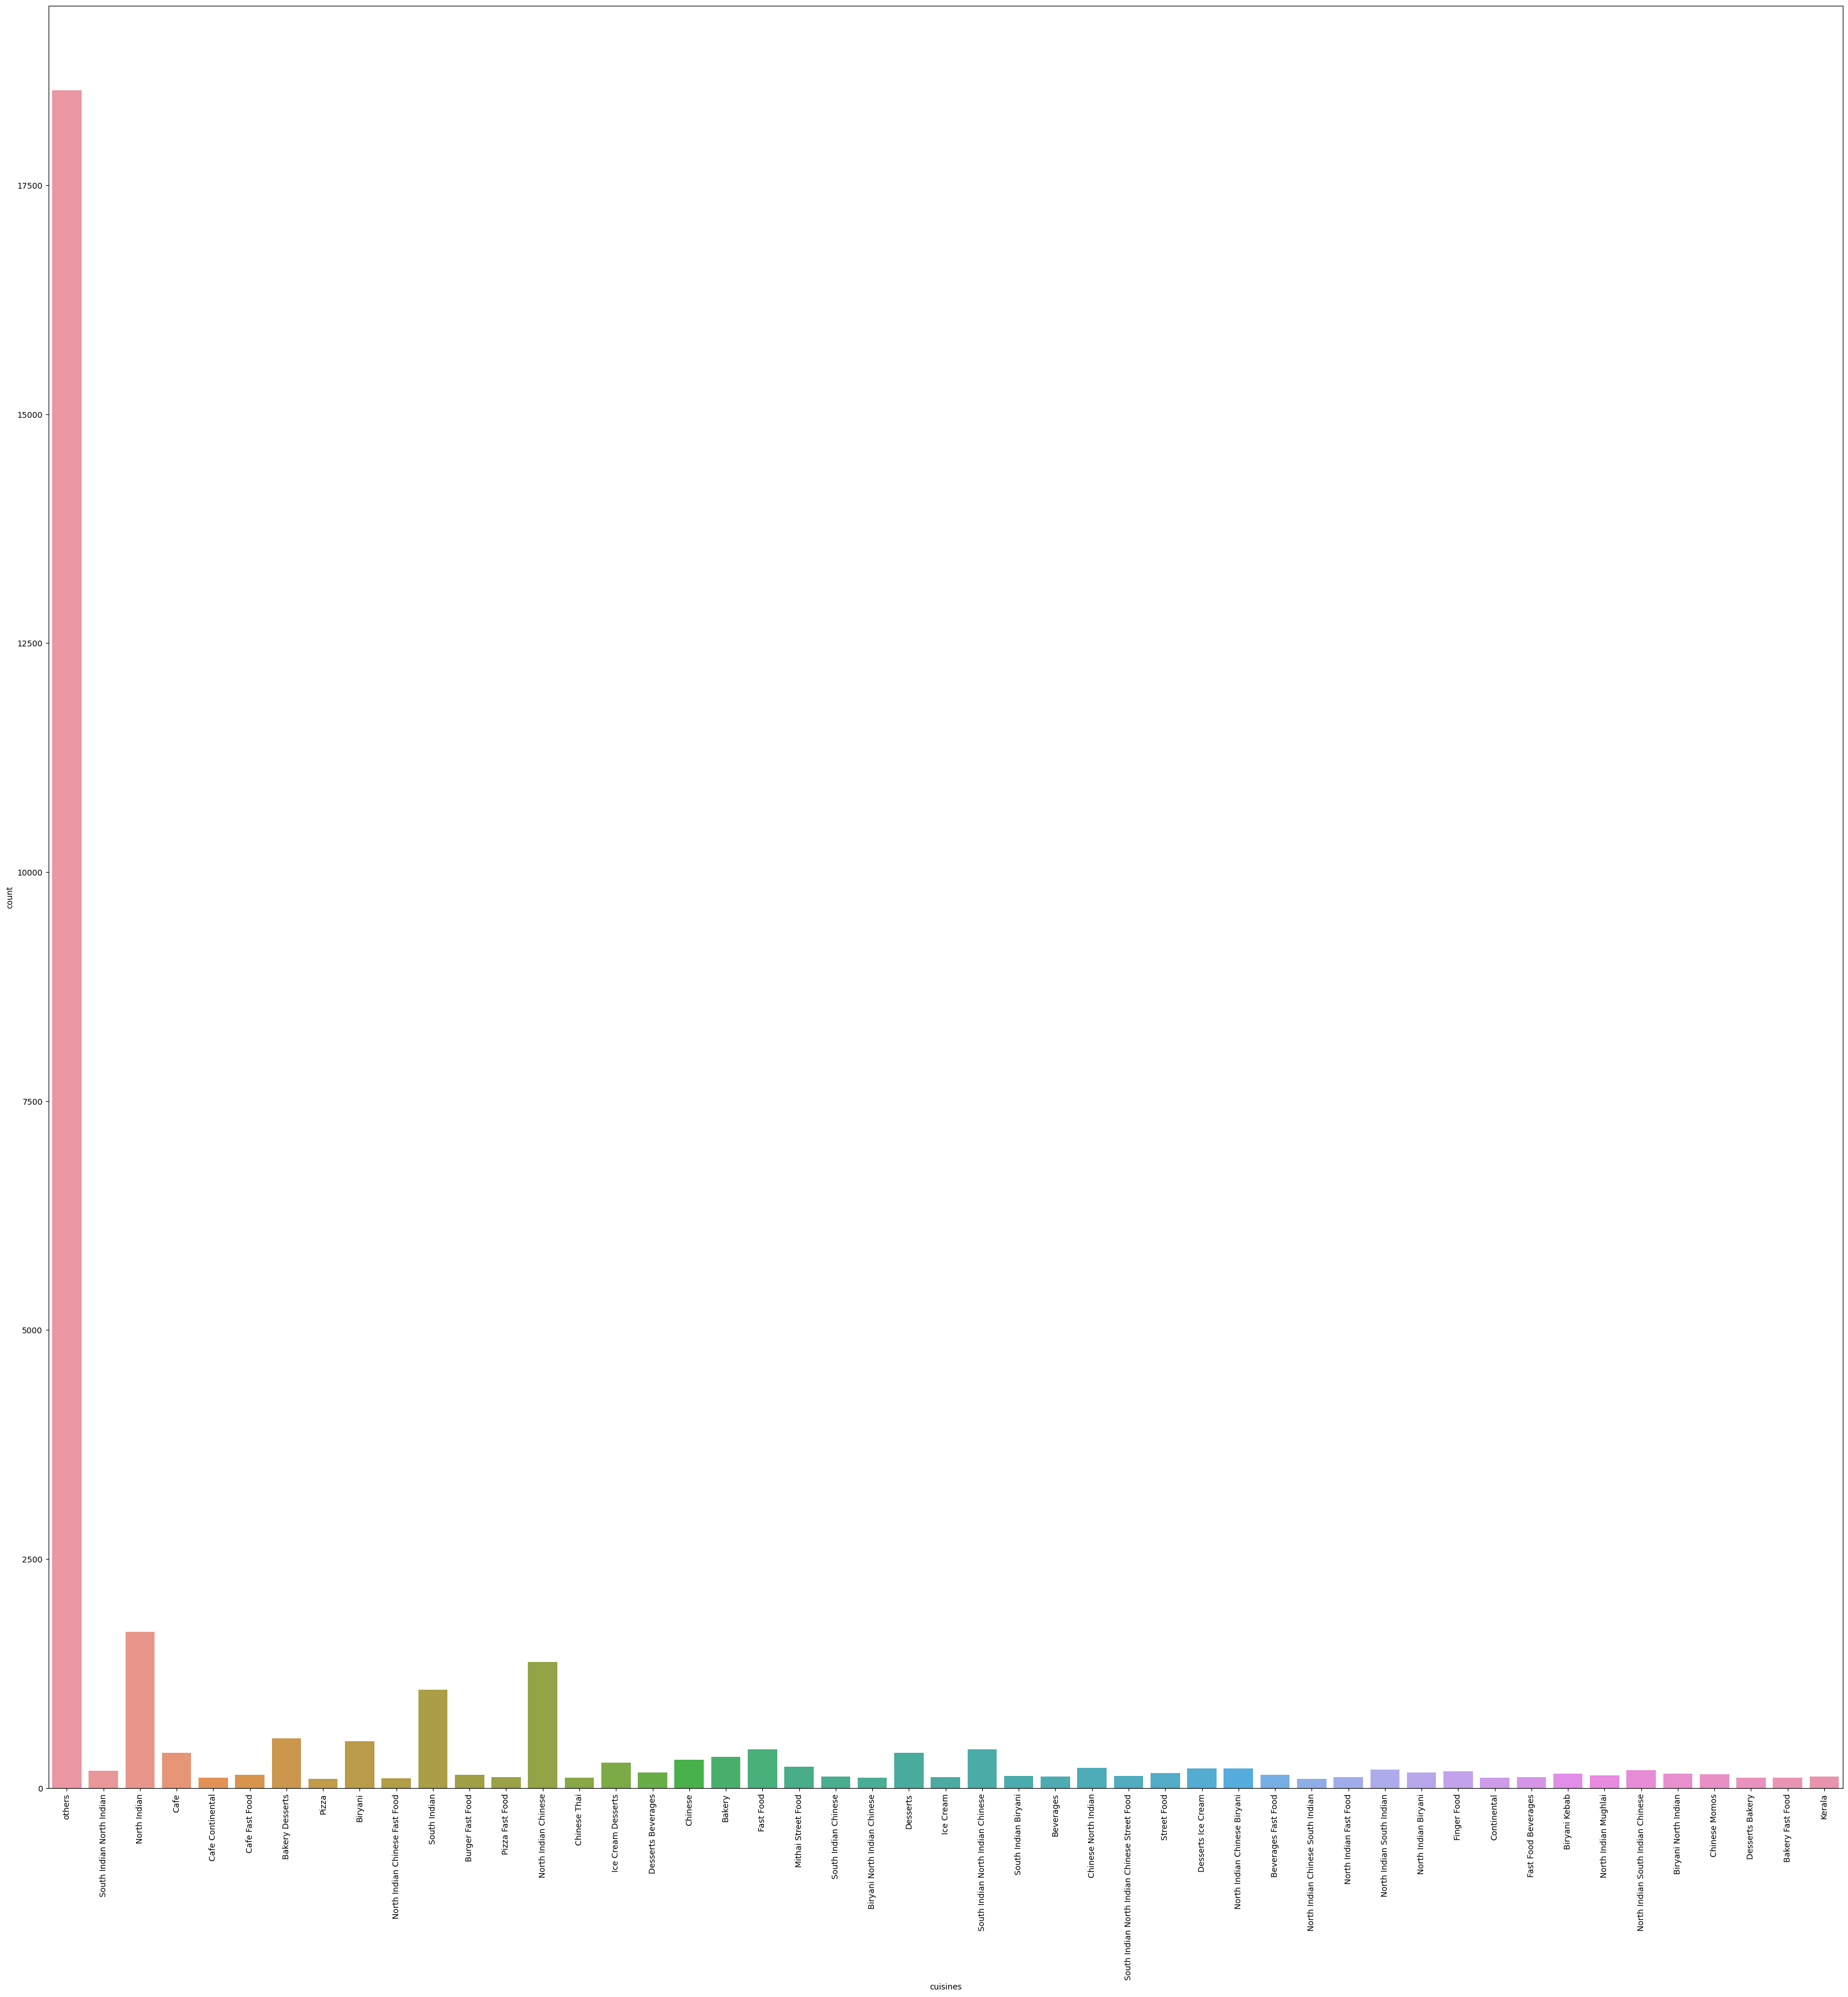

In [1162]:
plt.figure(figsize=(40,40))
sns.countplot(data=df,x='cuisines')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '1.8'),
  Text(1, 0, '2.0'),
  Text(2, 0, '2.1'),
  Text(3, 0, '2.2'),
  Text(4, 0, '2.3'),
  Text(5, 0, '2.4'),
  Text(6, 0, '2.5'),
  Text(7, 0, '2.6'),
  Text(8, 0, '2.7'),
  Text(9, 0, '2.8'),
  Text(10, 0, '2.9'),
  Text(11, 0, '3.0'),
  Text(12, 0, '3.1'),
  Text(13, 0, '3.2'),
  Text(14, 0, '3.3'),
  Text(15, 0, '3.4'),
  Text(16, 0, '3.5'),
  Text(17, 0, '3.6'),
  Text(18, 0, '3.7'),
  Text(19, 0, '3.700141861024285'),
  Text(20, 0, '3.8'),
  Text(21, 0, '3.9'),
  Text(22, 0, '4.0'),
  Text(23, 0, '4.1'),
  Text(24, 0, '4.2'),
  Text(25, 0, '4.3'),
  Text(26, 0, '4.4'),
  Text(27, 0, '4.5'),
  Text(28, 0, '4.6'),
  Text(29, 0, '4.7'),
  Text(30, 0, '4.8'),
  Text(31, 0, '4.9')])

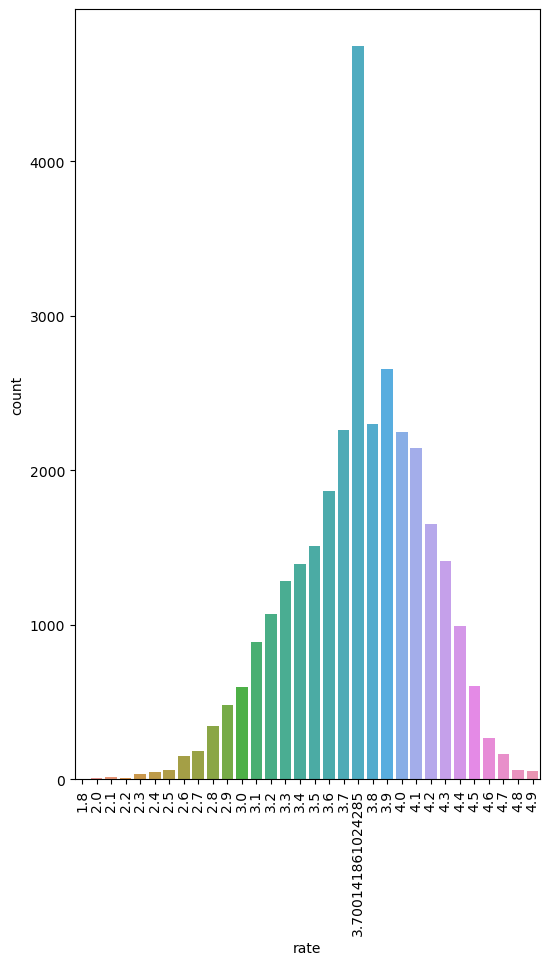

In [1163]:
plt.figure(figsize=(6,10))
sns.countplot(data=df,x='rate')
plt.xticks(rotation=90)

In [1164]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2people,types,new_Rate
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet,1
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,1
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Other,others,800.0,Buffet,1
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,South Indian North Indian,300.0,Buffet,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,1


# check correlation

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_13716\4263334851.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<AxesSubplot:>

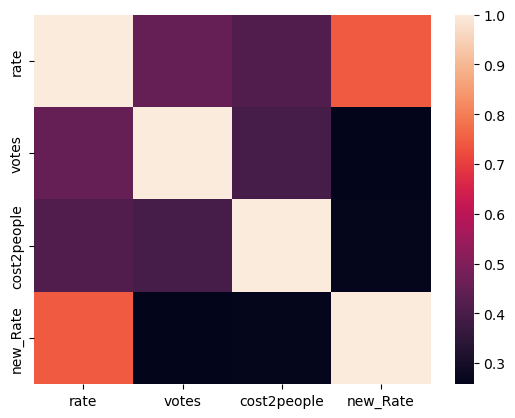

In [1165]:
correlation=df.corr()
sns.heatmap(correlation)

# 1)what is the most place to order online

In [1166]:
df1=df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_csv')
df1=pd.read_csv('location_csv')
df1=pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)
df1.head(10)

name      
online_order        No   Yes
location                    
BTM                626  1428
Banashankari       253   305
Banaswadi          180   212
Bannerghatta Road  380   633
Basavanagudi       167   263
Bellandur          365   625
Brigade Road       260   350
Brookefield        165   363
Church Street      176   258
Electronic City    655   555

<AxesSubplot:xlabel='location'>

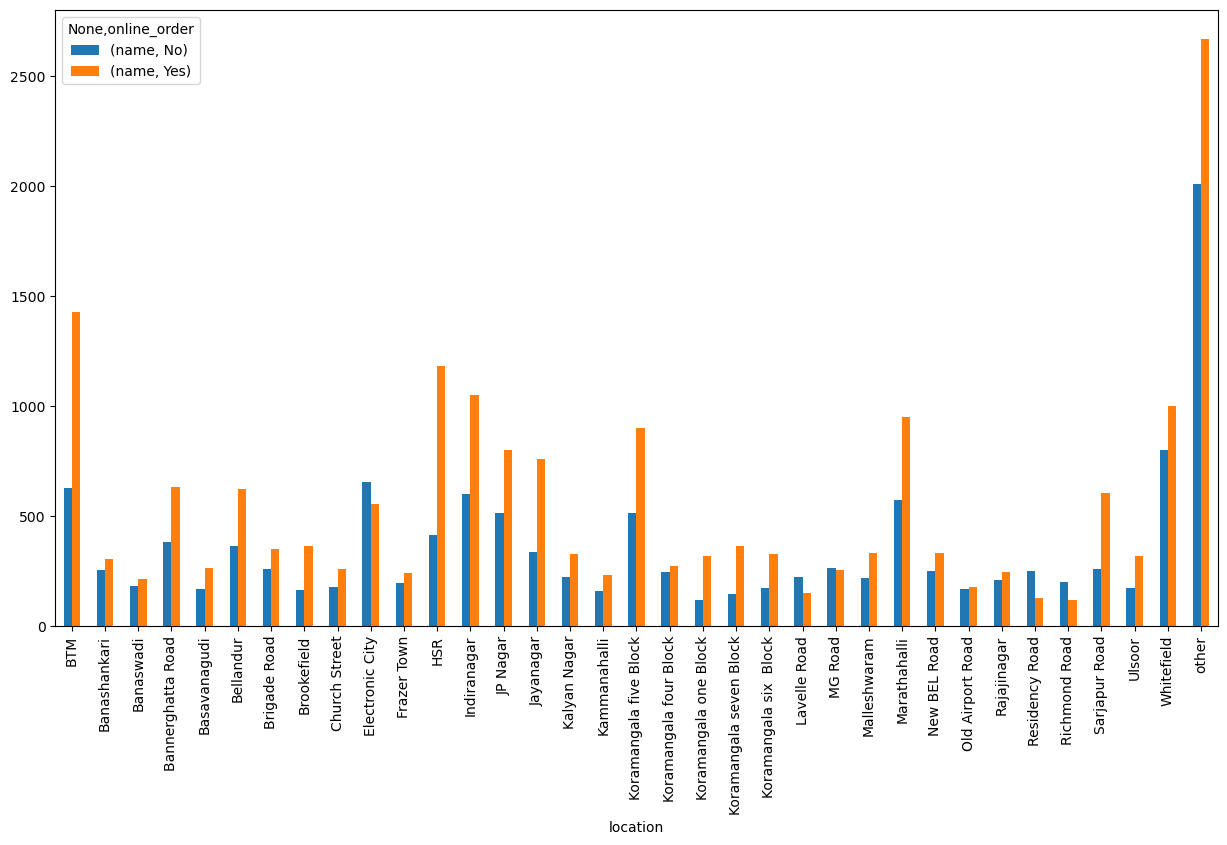

In [1167]:
df1.plot(kind='bar',figsize = (15,8))

# 2)what is the most expensive restaurant in thre area

In [1168]:
df2=df.groupby('location')['cost2people'].max()
df2.head()
df2.to_csv('cost_2p_csv')
df2=pd.read_csv('cost_2p_csv')
df2.head()

,location,cost2people
0,BTM,1600.0
1,Banashankari,1300.0
2,Banaswadi,1300.0
3,Bannerghatta Road,1700.0
4,Basavanagudi,2200.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'BTM'),
  Text(1, 0, 'Banashankari'),
  Text(2, 0, 'Banaswadi'),
  Text(3, 0, 'Bannerghatta Road'),
  Text(4, 0, 'Basavanagudi'),
  Text(5, 0, 'Bellandur'),
  Text(6, 0, 'Brigade Road'),
  Text(7, 0, 'Brookefield'),
  Text(8, 0, 'Church Street'),
  Text(9, 0, 'Electronic City'),
  Text(10, 0, 'Frazer Town'),
  Text(11, 0, 'HSR'),
  Text(12, 0, 'Indiranagar'),
  Text(13, 0, 'JP Nagar'),
  Text(14, 0, 'Jayanagar'),
  Text(15, 0, 'Kalyan Nagar'),
  Text(16, 0, 'Kammanahalli'),
  Text(17, 0, 'Koramangala five Block'),
  Text(18, 0, 'Koramangala four Block'),
  Text(19, 0, 'Koramangala one Block'),
  Text(20, 0, 'Koramangala seven Block'),
  Text(21, 0, 'Koramangala six  Block'),
  Text(22, 0, 'Lavelle Road'),
  Text(23, 0, 'MG Road'),
  Text(24, 0, 'Malleshwaram'),
  Text(25, 0, 'Marathahalli'),
  Text(26, 0, 'New

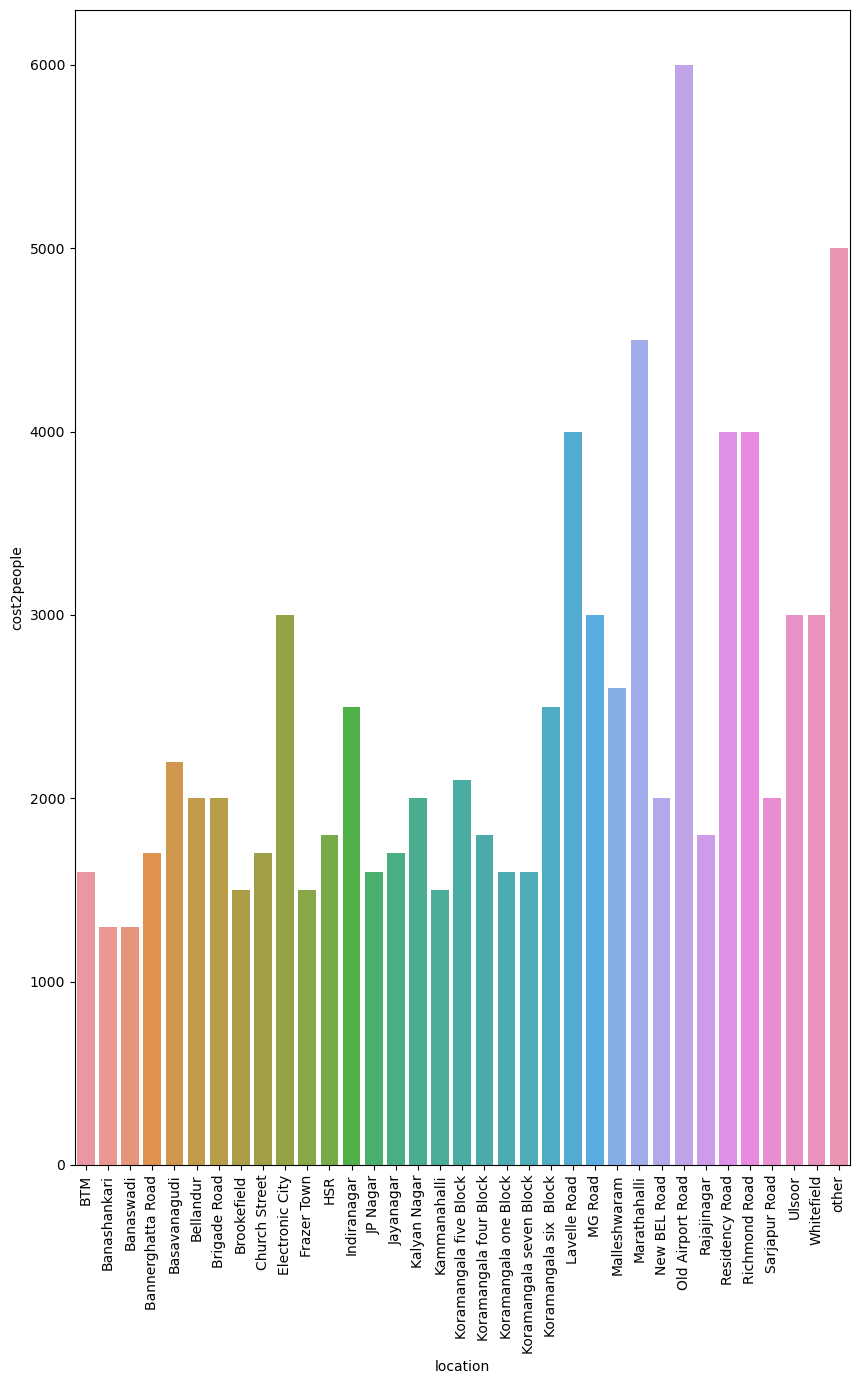

In [1169]:
plt.figure(figsize=(10,15))
sns.barplot(data=df2,x='location',y='cost2people',estimator=max)
plt.xticks(rotation=90)






# 3) What cities are available restaurants in which reservations are available for book _tabkle

In [1170]:
df3=df.groupby(['book_table','location'])['name'].count()
df3 = df.groupby(['location', 'book_table'])['name'].count()
df3.to_csv('location_booktable.csv')
df3 = pd.read_csv('location_booktable.csv')
df3 = pd.pivot_table(df3, values=None, index =['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df3

name     
book_table                 No  Yes
location                          
BTM                      1940  114
Banashankari              515   43
Banaswadi                 386    6
Bannerghatta Road         935   78
Basavanagudi              422    8
Bellandur                 897   93
Brigade Road              469  141
Brookefield               455   73
Church Street             269  165
Electronic City          1114   96
Frazer Town               432    8
HSR                      1421  177
Indiranagar              1221  433
JP Nagar                 1065  250
Jayanagar                 884  211
Kalyan Nagar              434  116
Kammanahalli              355   34
Koramangala five Block    833  584
Koramangala four Block    281  238
Koramangala one Block     393   42
Koramangala seven Block   384  125
Koramangala six  Block    424   76
Lavelle Road              173  201
MG Road                   254  264
Malleshwaram              469   81
Marathahalli             1369  154
New BEL Road              527   55
Old Airport Road          290   57
Rajajinagar               416   40
Residency Road            262  115
Richmond Road             241   78
Sarjapur Road             721  145
Ulsoor                    386  105
Whitefield               1558  246
other                    4079  599

<AxesSubplot:xlabel='location'>

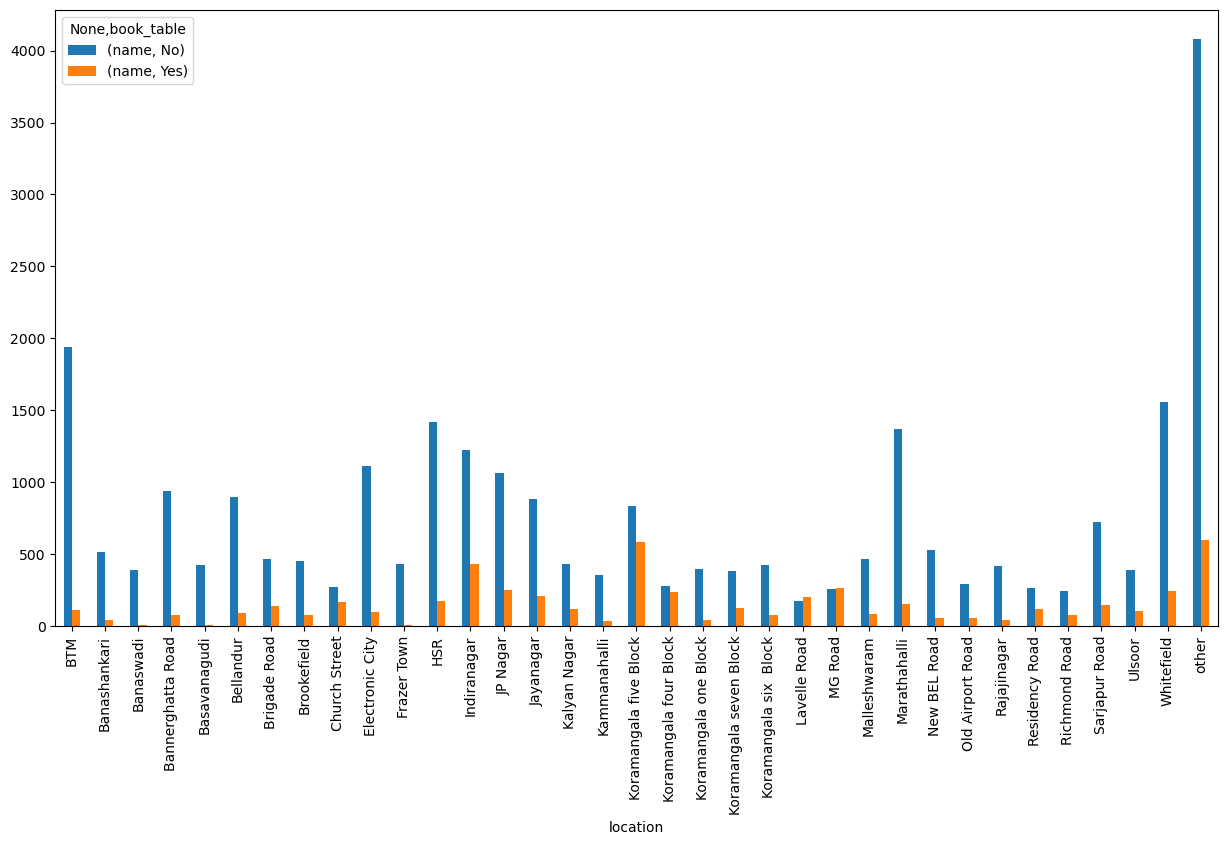

In [1171]:
df3.plot(kind='bar',figsize=(15,8))

# 4) Grouping Types of Resaurants, Location Wise

In [1172]:
df4 = df.groupby(['location', 'types'])['name'].count()
df4.to_csv('location_Type.csv')
df4= pd.read_csv('location_Type.csv')
df4= pd.pivot_table(df4, values=None, index=['location'], columns=['types'], fill_value=0, aggfunc=np.sum)
df4

name                                  \
types                   Buffet Cafes Delivery Desserts Dineout   
location                                                         
BTM                         14    37     1151       99     728   
Banashankari                 5    24      240       46     236   
Banaswadi                    0    13      157       19     198   
Bannerghatta Road            8    26      496       88     384   
Basavanagudi                 3     8      183       45     189   
Bellandur                   24    31      454       59     392   
Brigade Road                11    23      216       46     243   
Brookefield                  6    17      266       38     197   
Church Street               19    43      134       19     168   
Electronic City             22    24      547       71     504   
Frazer Town                  1    10      243       44     138   
HSR                         14    42      963      106     445   
Indiranagar                 38    92      774      128     495   
JP Nagar                    25    41      612      100     490   
Jayanagar                   18    50      492      111     412   
Kalyan Nagar                 9    24      187       45     270   
Kammanahalli                 2    14      157       18     195   
Koramangala five Block      48   106      527      110     494   
Koramangala four Block      10    36      203       34     158   
Koramangala one Block        3    12      245       25     136   
Koramangala seven Block     18    22      193       50     184   
Koramangala six  Block      11    25      208       37     176   
Lavelle Road                24    19       80       22     152   
MG Road                     30    53      128       33     206   
Malleshwaram                11    24      195       61     229   
Marathahalli                33    27      795       89     557   
New BEL Road                 4    29      277       33     223   
Old Airport Road            11     5      146       28     136   
Rajajinagar                  9     4      194       43     193   
Residency Road              13    17       94       34     164   
Richmond Road               31    11       89       30     148   
Sarjapur Road               21    19      432       71     282   
Ulsoor                      12    29      196       31     195   
Whitefield                  26    48      862      116     678   
other                       86   149     2251      290    1712   

                                                            
types                   Drinks and nightlife Pubs and bars  
location                                                    
BTM                                       13            12  
Banashankari                               7             0  
Banaswadi                                  4             1  
Bannerghatta Road                          9             2  
Basavanagudi                               2             0  
Bellandur                                 16            14  
Brigade Road                              50            21  
Brookefield                                4             0  
Church Street                             30            21  
Electronic City                           21            21  
Frazer Town                                2             2  
HSR                                       14            14  
Indiranagar                               63            64  
JP Nagar                                  40             7  
Jayanagar                                 12             0  
Kalyan Nagar                              15             0  
Kammanahalli                               3             0  
Koramangala five Block                    74            58  
Koramangala four Block                    48            30  
Koramangala one Block                      5             9  
Koramangala seven Block                   21            21  
Koramangala six  Block                    25         

<AxesSubplot:xlabel='location'>

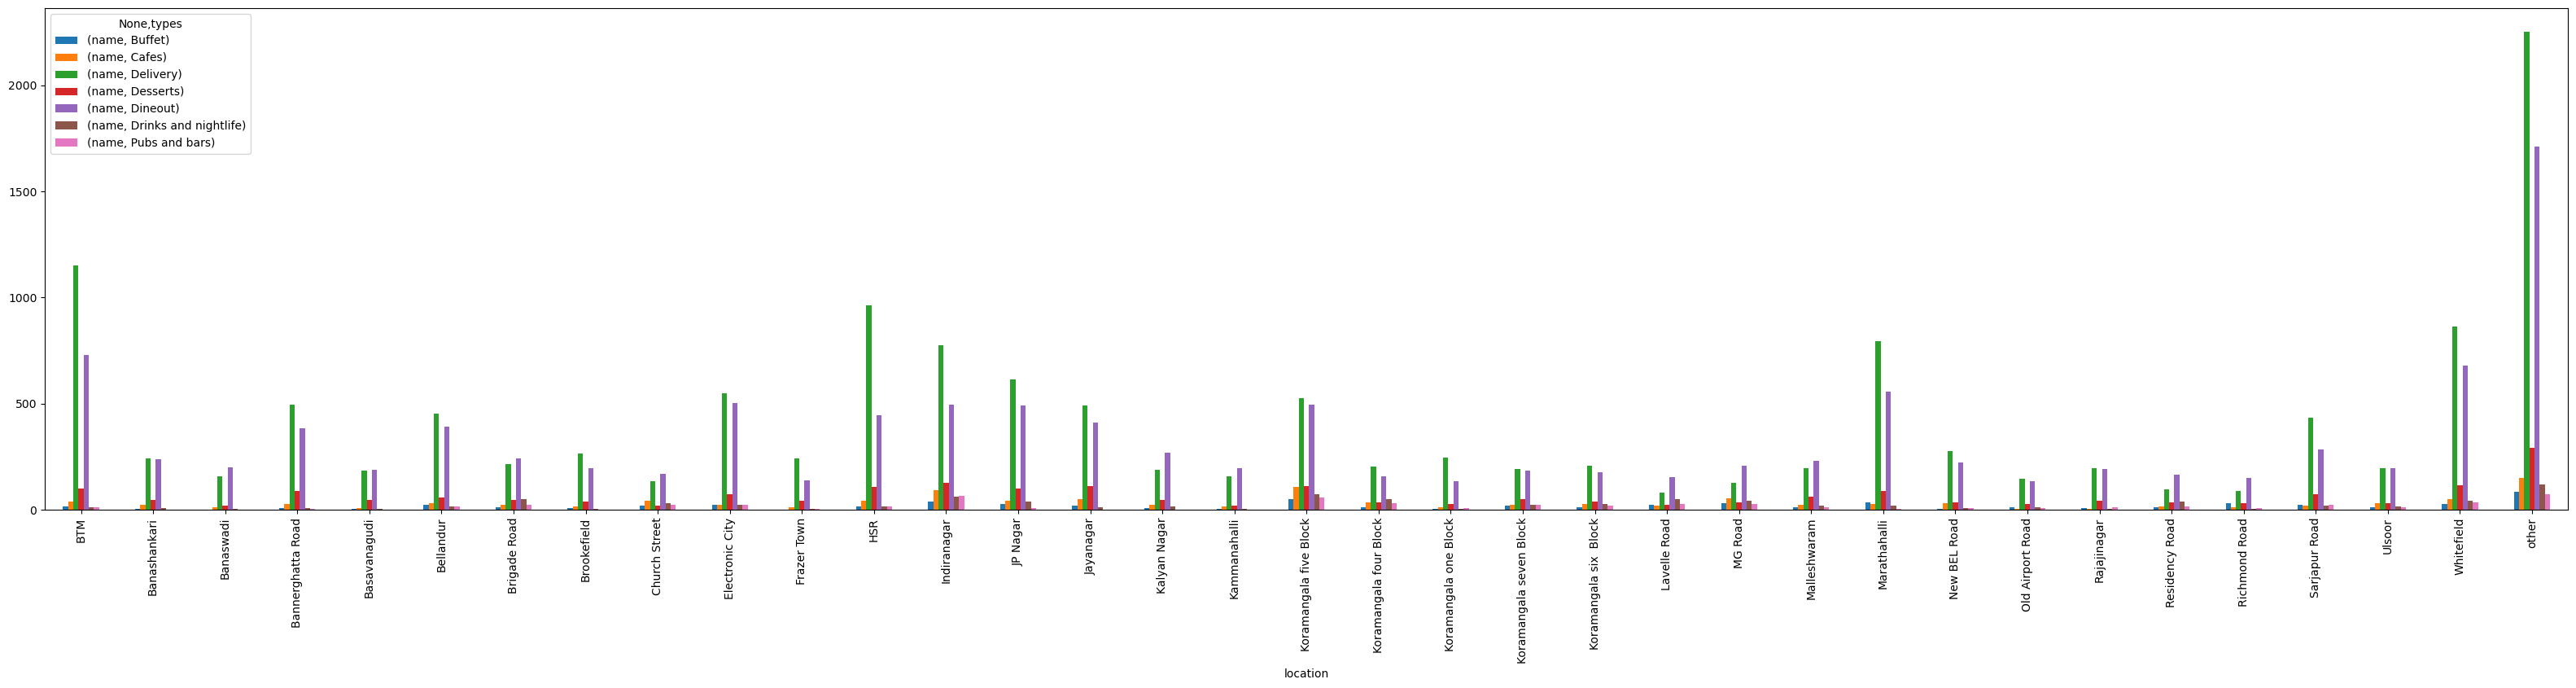

In [1173]:
df4.plot(kind='bar',figsize=(40,8))

# 5)what is the most cuisines get more votes

In [1174]:
df6=df[['cuisines','votes']]
df6.duplicated().sum()
df6.drop_duplicates()
df7=df6.groupby(['cuisines'])['votes'].sum()
df7=pd.DataFrame(df7)
df7=df7.sort_values('votes', ascending=False)
df7

,votes
cuisines,
others,10390456
North Indian,425214
North Indian Chinese,170980
South Indian,127314
North Indian Mughlai,85862
Chinese,77814
North Indian South Indian,74189
Cafe,66103
Chinese Momos,61586


In [1175]:
df7=df7.iloc[1:, :]
df7.head()

,votes
cuisines,
North Indian,425214
North Indian Chinese,170980
South Indian,127314
North Indian Mughlai,85862
Chinese,77814


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'North Indian South Indian'),
  Text(6, 0, 'Cafe'),
  Text(7, 0, 'Chinese Momos'),
  Text(8, 0, 'Desserts'),
  Text(9, 0, 'Ice Cream Desserts'),
  Text(10, 0, 'Biryani North Indian Chinese'),
  Text(11, 0, 'Cafe Continental'),
  Text(12, 0, 'Finger Food'),
  Text(13, 0, 'Continental'),
  Text(14, 0, 'Burger Fast Food'),
  Text(15, 0, 'Desserts Beverages'),
  Text(16, 0, 'South Indian North Indian Chinese'),
  Text(17, 0, 'Biryani'),
  Text(18, 0, 'Bakery Desserts'),
  Text(19, 0, 'Pizza Fast Food'),
  Text(20, 0, 'Chinese Thai'),
  Text(21, 0, 'South Indian North Indian Chinese Street Food'),
  Text(2

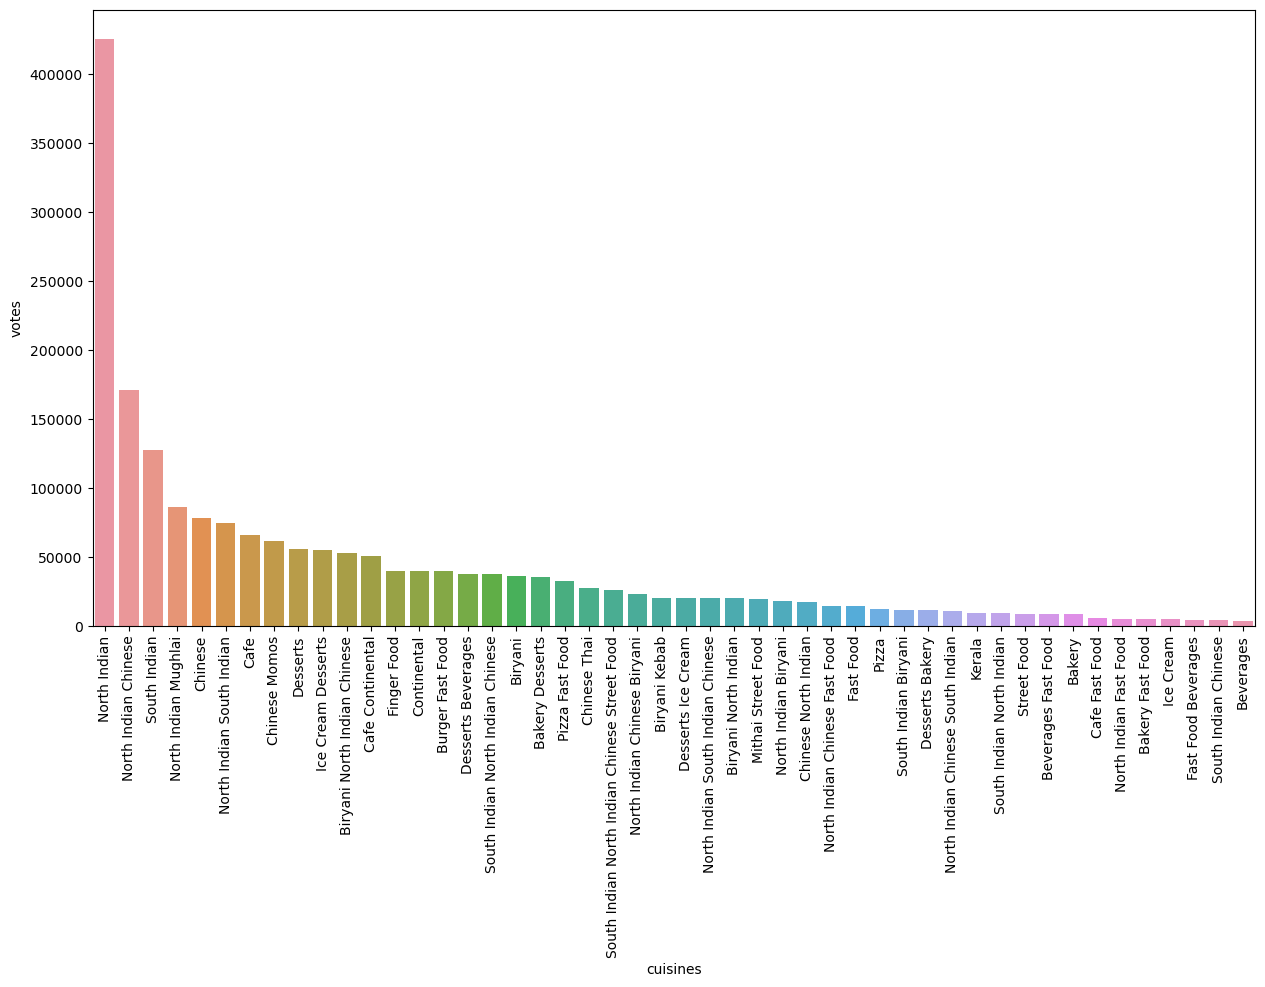

In [1176]:
plt.figure(figsize = (15, 8))
sns.barplot(x=df7.index, y=df7['votes'])
plt.xticks(rotation=90)

# what the most location take more vots

In [1177]:
df8 = df[['location', 'votes']]
df8.drop_duplicates()
df8=df8.groupby('location')['votes'].sum()
df8=df8.to_frame()
df8=df8.sort_values('votes',ascending=False).index
df8

Index(['Koramangala five Block', 'Indiranagar', 'other',
       'Koramangala four Block', 'Church Street', 'JP Nagar', 'Whitefield',
       'Lavelle Road', 'Marathahalli', 'HSR', 'Sarjapur Road',
       'Koramangala seven Block', 'Jayanagar', 'BTM', 'Brigade Road',
       'MG Road', 'Koramangala six  Block', 'Residency Road', 'Malleshwaram',
       'Bellandur', 'Bannerghatta Road', 'New BEL Road',
       'Koramangala one Block', 'Old Airport Road', 'Kalyan Nagar', 'Ulsoor',
       'Brookefield', 'Electronic City', 'Banashankari', 'Richmond Road',
       'Frazer Town', 'Rajajinagar', 'Kammanahalli', 'Basavanagudi',
       'Banaswadi'],
      dtype='object', name='location')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Koramangala five Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'other'),
  Text(3, 0, 'Koramangala four Block'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'Whitefield'),
  Text(7, 0, 'Lavelle Road'),
  Text(8, 0, 'Marathahalli'),
  Text(9, 0, 'HSR'),
  Text(10, 0, 'Sarjapur Road'),
  Text(11, 0, 'Koramangala seven Block'),
  Text(12, 0, 'Jayanagar'),
  Text(13, 0, 'BTM'),
  Text(14, 0, 'Brigade Road'),
  Text(15, 0, 'MG Road'),
  Text(16, 0, 'Koramangala six  Block'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Malleshwaram'),
  Text(19, 0, 'Bellandur'),
  Text(20, 0, 'Bannerghatta Road'),
  Text(21, 0, 'New BEL Road'),
  Text(22, 0, 'Koramangala one Block'),
  Text(23, 0, 'Old Airport Road'),
  Text(24, 0, 'Kalyan Nagar'),
  Text(25, 0, 'Ulsoor'),
  Text(26, 0, 'Brookefie

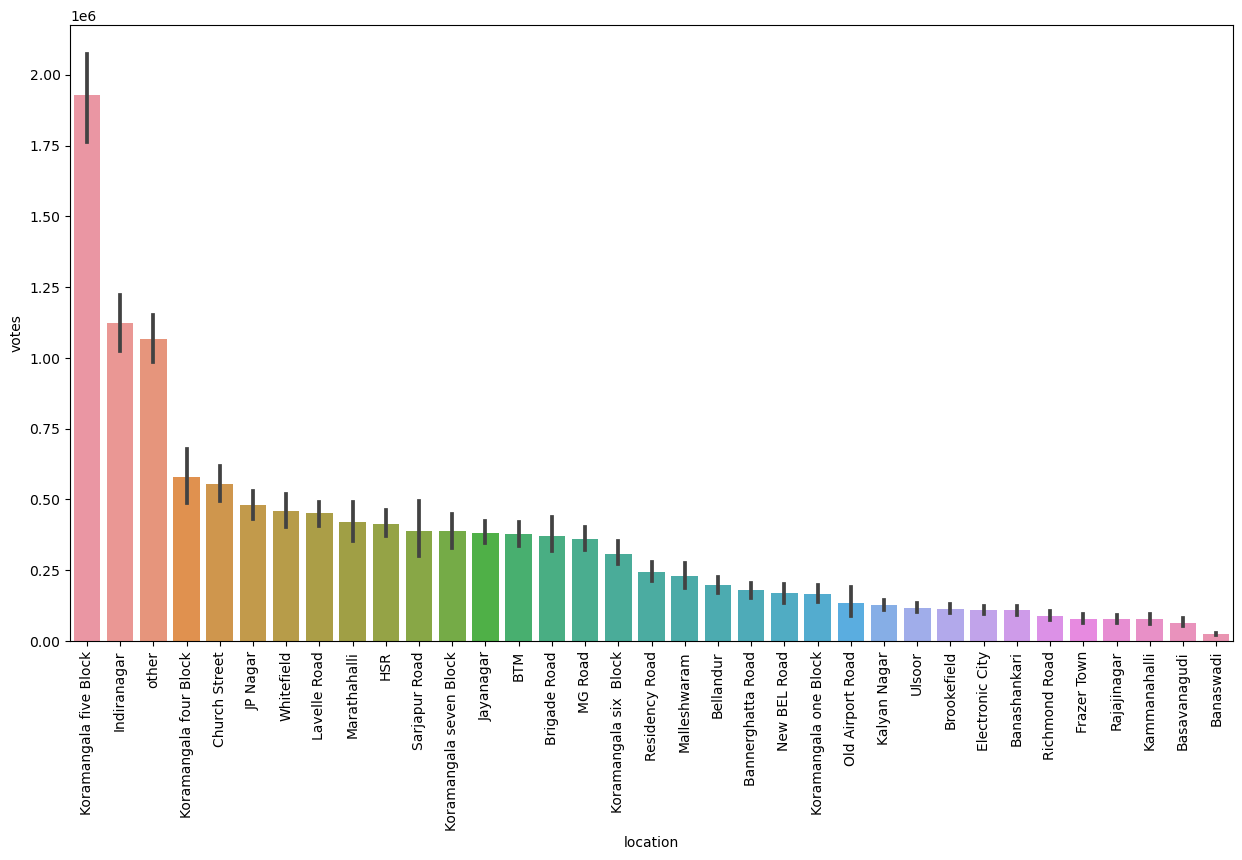

In [1178]:
plt.figure(figsize = (15, 8))
sns.barplot(data=df,x='location',y='votes',order=df8,estimator=sum)
plt.xticks(rotation=90)

In [1179]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2people,types,new_Rate
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,others,800.0,Buffet,1
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,others,800.0,Buffet,1
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,Other,others,800.0,Buffet,1
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,South Indian North Indian,300.0,Buffet,0
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,others,600.0,Buffet,1
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Other,Continental,1500.0,Pubs and bars,0
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Other,Finger Food,600.0,Pubs and bars,1
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,Other,Finger Food,2000.0,Pubs and bars,1
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,other,Other,Finger Food,2500.0,Pubs and bars,1


# check_outliers

In [1180]:
from datasist.structdata import detect_outliers
det_out=detect_outliers(df,0,['cost2people','rate','votes'])
len(det_out)

5838

In [1181]:
#df2=df.copy()

# ML

In [1182]:
df.drop(['rate'],axis=1,inplace=True)

In [1183]:
df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,cost2people,types,new_Rate
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,others,800.0,Buffet,1
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,others,800.0,Buffet,1
2,San Churro Cafe,Yes,No,918,Banashankari,Other,others,800.0,Buffet,1
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,South Indian North Indian,300.0,Buffet,0
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,others,600.0,Buffet,1


In [1184]:
for name in df['name'].unique():
    print(name)

Jalsa
Spice Elephant
San Churro Cafe
Addhuri Udupi Bhojana
Grand Village
Timepass Dinner
Rosewood International Hotel - Bar & Restaurant
Onesta
Penthouse Cafe
Smacznego
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley
Cafe Shuffle
The Coffee Shack
Caf-Eleven
Cafe Vivacity
Catch-up-ino
Kirthi's Biryani
T3H Cafe
360 Atoms Restaurant And Cafe
The Vintage Cafe
Woodee Pizza
Cafe Coffee Day
My Tea House
Hide Out Cafe
CAFE NOVA
Coffee Tindi
Sea Green Cafe
Cuppa
Srinathji's Cafe
Redberrys
Foodiction
Sweet Truth
Ovenstory Pizza
Faasos
Behrouz Biryani
Fast And Fresh
Szechuan Dragon
Empire Restaurant
Maruthi Davangere Benne Dosa
Chaatimes
Havyaka Mess
McDonald's
Domino's Pizza
Hotboxit
Kitchen Garden
Recipe
Beijing Bites
Tasty Bytes
Petoo
Shree Cool Point
Corner House Ice Cream
Biryanis And More
Roving Feast
FreshMenu
Banashankari Donne Biriyani
Wamama
Five Star Chicken
XO Belgian Waffle
Peppy Peppers
Goa 0 Km
Chinese Kitchen
1947
Cake of the Day
Kabab Magic
Namma Brahmin's Idli
Gustoes Beer Ho

In [1185]:
df.drop('name',axis=1,inplace=True)

In [1186]:
df.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost2people,types,new_Rate
0,Yes,Yes,775,Banashankari,Casual Dining,others,800.0,Buffet,1
1,Yes,No,787,Banashankari,Casual Dining,others,800.0,Buffet,1
2,Yes,No,918,Banashankari,Other,others,800.0,Buffet,1
3,No,No,88,Banashankari,Quick Bites,South Indian North Indian,300.0,Buffet,0
4,No,No,166,Basavanagudi,Casual Dining,others,600.0,Buffet,1


In [1187]:
df.duplicated().sum()

1758

In [1188]:
df.drop_duplicates(inplace=True)

In [1189]:
df.duplicated().sum()

0

In [1242]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from pipeline import pipeline
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import precision_score , recall_score, f1_score, confusion_matrix,  ConfusionMatrixDisplay ,accuracy_score

# encodede columns

# df.columns

In [1191]:
encodede_column=['online_order', 'book_table','location','rest_type','cuisines','types']
#Binary_encoder=['location','cuisines']

In [1192]:
C_Trans=ColumnTransformer(transformers=[('Encoder',OneHotEncoder(sparse=False,drop='first'),encodede_column)],remainder="passthrough")

In [1193]:
C_Trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('Encoder',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['online_order', 'book_table', 'location',
                                  'rest_type', 'cuisines', 'types'])])

In [1194]:
df.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost2people,types,new_Rate
0,Yes,Yes,775,Banashankari,Casual Dining,others,800.0,Buffet,1
1,Yes,No,787,Banashankari,Casual Dining,others,800.0,Buffet,1
2,Yes,No,918,Banashankari,Other,others,800.0,Buffet,1
3,No,No,88,Banashankari,Quick Bites,South Indian North Indian,300.0,Buffet,0
4,No,No,166,Basavanagudi,Casual Dining,others,600.0,Buffet,1


# split_data

In [1195]:
x=df.drop('new_Rate',axis=1)
y=df['new_Rate']

In [1196]:
#show transformed data
data_transform=pd.DataFrame(C_Trans.fit_transform(x),columns=C_Trans.get_feature_names_out())
data_transform.head()

,Encoder__online_order_Yes,Encoder__book_table_Yes,Encoder__location_Banashankari,Encoder__location_Banaswadi,Encoder__location_Bannerghatta Road,Encoder__location_Basavanagudi,Encoder__location_Bellandur,Encoder__location_Brigade Road,Encoder__location_Brookefield,Encoder__location_Church Street,...,Encoder__cuisines_Street Food,Encoder__cuisines_others,Encoder__types_Cafes,Encoder__types_Delivery,Encoder__types_Desserts,Encoder__types_Dineout,Encoder__types_Drinks and nightlife,Encoder__types_Pubs and bars,remainder__votes,remainder__cost2people
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,775.0,800.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,787.0,800.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,800.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,300.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,166.0,600.0


In [1216]:
data_transform['Encoder__book_table_Yes'].unique()

array([1., 0.])

In [1217]:
df.new_Rate.value_counts()

1    18060
0    11707
Name: new_Rate, dtype: int64

<AxesSubplot:xlabel='new_Rate', ylabel='count'>

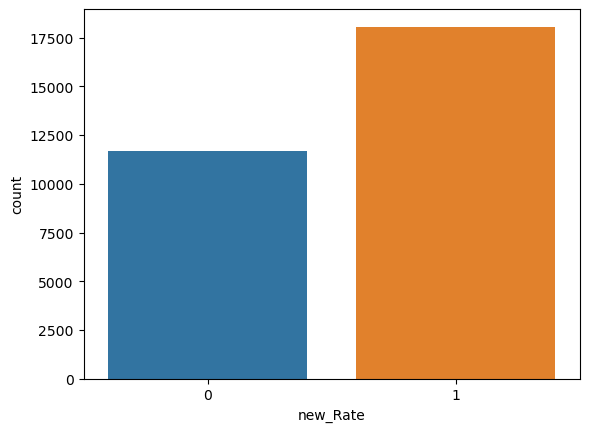

In [1218]:
sns.countplot(data=df,x=df['new_Rate'])

In [1219]:
models=list()
models.append(('lg',LogisticRegression()))
#models.append(('SVR',SVR()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('GR',GradientBoostingClassifier()))
models.append(('BA',BaggingClassifier()))
models.append(('ADBO',AdaBoostClassifier()))
models.append(('XGB',XGBClassifier()))

x_scaled= x-x_min / x_max-x_min

to use a scaler,you must fit to the training  data, and tranformed both the train and test data using the same scaler

In [1220]:
for model in models:
    steps=list()
    steps.append(('encoder',C_Trans))
    steps.append(('scaler', StandardScaler() ))
    steps.append(model)
    pipeline =Pipeline(steps = steps)
    scores = cross_validate(pipeline , x ,y , cv = 5 , scoring="accuracy" , return_train_score=True, return_estimator=True)
    print(model[0])
    print("Train_accuracy" , scores["train_score"].mean() )
    print("Test_accuracy" , scores["test_score"].mean())
    print("-" * 20)
    print("\n")

lg
Train_accuracy 0.7208067297659551
Test_accuracy 0.6617750138936844
--------------------


DT
Train_accuracy 0.9972536679838747
Test_accuracy 0.8821183076637558
--------------------


RF
Train_accuracy 0.9972536679838747
Test_accuracy 0.8862491882302084
--------------------


GR
Train_accuracy 0.8548308391419297
Test_accuracy 0.8293075062685922
--------------------


BA
Train_accuracy 0.994053811353419
Test_accuracy 0.8971008427283454
--------------------


ADBO
Train_accuracy 0.8438959058361959
Test_accuracy 0.8214462172924275
--------------------


XGB
Train_accuracy 0.9140155244565333
Test_accuracy 0.8538312007489413
--------------------




# bulid _model

In [1251]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7,stratify=y)
steps=list()
steps.append(('encoder',C_Trans))
steps.append(('scaler',StandardScaler()))
steps.append(('RF',XGBClassifier(n_estimators=100, max_depth=10)))
pipeline=Pipeline(steps=steps)
scores = cross_validate(pipeline , x_train ,y_train , cv = 5 , scoring="accuracy" , return_train_score=True, return_estimator=True)
print("Train_accuracy" , scores["train_score"].mean() )
print("Test_accuracy" , scores["test_score"].mean())

Train_accuracy 0.9662723079100101
Test_accuracy 0.9021404698372691


In [1252]:
model=pipeline.fit(x_train,y_train)

In [1253]:
model

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['online_order', 'book_table',
                                                   'location', 'rest_type',
                                                   'cuisines', 'types'])])),
                ('scaler', StandardScaler()),
                ('RF',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsa...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=10, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [1254]:
y_train_pre=model.predict(x_train)
y_test_pre=model.predict(x_test)

NOW we can check how oure model performs using the evaluation metrics we imported

in this cade we intersted recall_score   recall=tp/tp+fn     precission=tp/tp+fp

In [1255]:
print('accuracy score:',accuracy_score(y_test,y_test_pre))
print('accuracy score:',accuracy_score(y_train,y_train_pre))

print('pression score',precision_score(y_test,y_test_pre))

print('Recall score',recall_score(y_test,y_test_pre))

print('F1 score',f1_score(y_test,y_test_pre))

accuracy score: 0.9123278468256634
accuracy score: 0.966260318679209
pression score 0.9297367445309603
Recall score 0.9254474995386602
F1 score 0.9275871635993712


# confusion_matrix

In [1256]:
cm=confusion_matrix(y_test,y_test_pre)
cm

array([[3133,  379],
       [ 404, 5015]], dtype=int64)

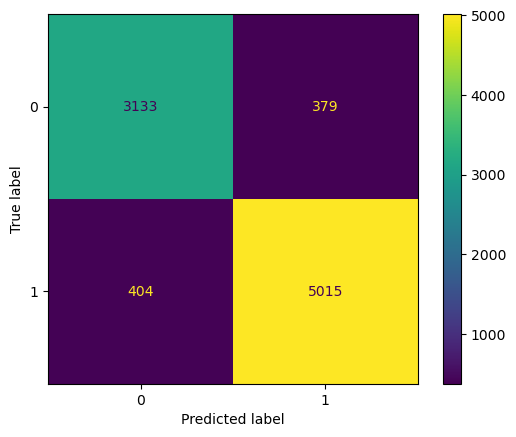

In [1257]:
ConfusionMatrixDisplay(cm,display_labels=model.classes_).plot()

# plot roc curve

In [1258]:
from sklearn.metrics import plot_roc_curve

C:\Users\Abdullah\.conda\envs\HCAI\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


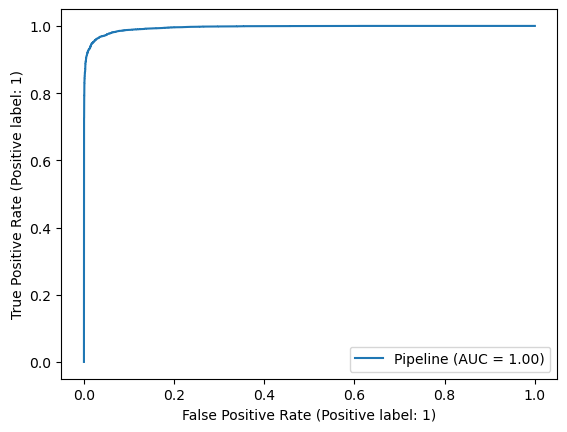

In [1259]:
plot_roc_curve(pipeline,x_train,y_train)   #tp

C:\Users\Abdullah\.conda\envs\HCAI\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


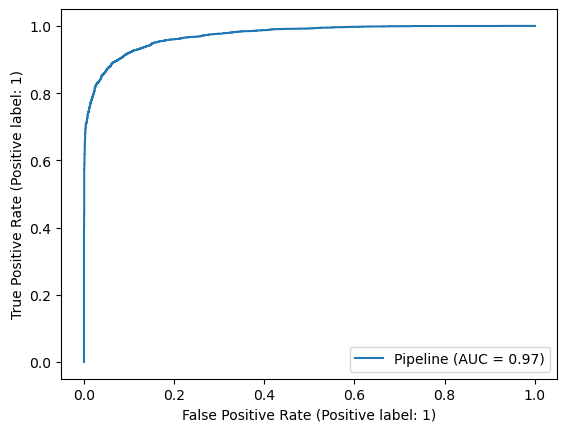

In [1260]:
plot_roc_curve(pipeline,x_test,y_test)

# save_Model

In [1261]:
import joblib

In [1262]:
joblib.dump(model,'model.h5')
joblib.dump(x.columns,'input.h5')

['input.h5']